In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


/home/test/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any be

In [5]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('new-pci-thesis.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(0, inplace=True)
df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('new-pci-thesis-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('new-pci-thesis-cleaned.csv')

any nan = False
all finite = True


In [6]:
# Take a quick look at the dataset
df.head()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
0,0.0,3.80,0.00,0.32,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1.01,0.0,0.0,0.00,0.00,0.00,1.55,36.0
1,0.0,1.59,0.00,1.70,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.09,0.0,0.0,0.00,2.22,0.00,1.25,56.0
2,0.0,0.93,0.00,0.75,3.64,0.00,0.74,0.00,0.0,0.0,0.00,0.60,0.0,0.0,0.26,0.00,0.00,0.33,46.0
3,0.0,11.97,2.99,0.00,1.22,0.00,0.00,0.43,0.0,0.0,0.25,0.00,0.0,0.0,0.00,0.00,2.97,0.00,45.0
4,0.0,1.33,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.32,0.00,87.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC1     317 non-null    float64
 1   AC2     317 non-null    float64
 2   AC3     317 non-null    float64
 3   BE1     317 non-null    float64
 4   BE2     317 non-null    float64
 5   BE3     317 non-null    float64
 6   D1      317 non-null    float64
 7   D2      317 non-null    float64
 8   D3      317 non-null    float64
 9   F1      317 non-null    float64
 10  F2      317 non-null    float64
 11  F3      317 non-null    float64
 12  G1      317 non-null    float64
 13  G2      317 non-null    float64
 14  G3      317 non-null    float64
 15  H1      317 non-null    float64
 16  H2      317 non-null    float64
 17  H3      317 non-null    float64
 18  PCI     317 non-null    float64
dtypes: float64(19)
memory usage: 47.2 KB


In [8]:
df.describe()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,0.407947,0.736139,0.678215,0.159509,0.472737,0.428982,0.174002,0.264015,0.223248,0.050864,0.028341,0.040132,0.034953,0.064312,0.089778,0.071442,0.205202,0.119956,57.517350
std,0.561006,1.073709,1.063222,0.405088,0.742347,0.698721,0.309372,0.417293,0.395491,0.192053,0.089563,0.137275,0.133693,0.191520,0.234143,0.258022,0.550808,0.347469,21.650391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,0.150000,0.459000,0.330000,0.000000,0.150000,0.090000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000
75%,0.620000,1.120000,0.950000,0.100000,0.660000,0.600000,0.230000,0.380000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,3.050000,11.970000,12.500000,2.770000,5.600000,4.560000,1.910000,2.600000,3.200000,2.100000,0.900000,1.200000,1.200000,1.620000,2.000000,2.400000,3.200000,3.080000,100.000000


#### Creation of Linear Regression Objects

In [9]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['PCI'],axis=1)

# Choose the response variable 'y' 
y = df.PCI



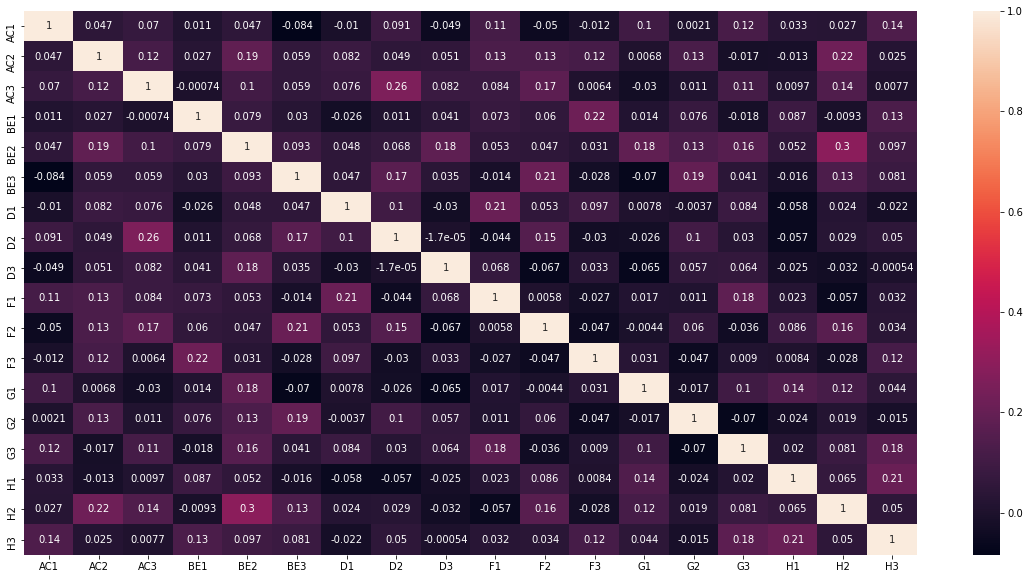

In [10]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [12]:

# sns.pairplot(X)

In [13]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [16]:
# start = 0
# r2_list = []
# for rs in range(50):
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)


# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)
print(f"r2 = {multi_linear.score(X_test,y_test)}")
# r2_list.append(multi_linear.score(X_test,y_test))

# for i,r2 in enumerate(r2_list):
#     if r2>0.55 and r2< 1.62:
#         print(f"{i+start}: {r2}")

r2 = 0.5884408236956802


#### Printing the individual $\beta$ values

In [15]:
print(f"Coefficients: {multi_coef}")


Coefficients: [ -4.3610102   -0.79859086  -4.68833477   4.47208848  -1.61648292
  -3.36926703  -6.7482243   -0.42032782 -13.34933054 -20.68149475
 -58.35123241 -66.35812848  -6.64927523  -2.76938401  -7.38737941
  -0.37920044  -2.54452386  -6.54078471]


[Text(0, 0.5, 'target'),
 Text(0.5, 0, 'predicted'),
 Text(0.5, 1.0, 'test PCI predicted vs target')]

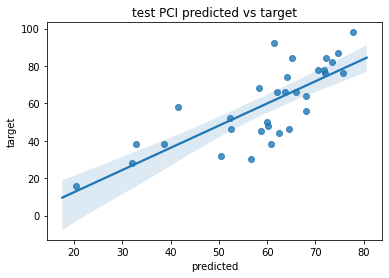

In [17]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=x_test_prediction, y=y_test)
ax.set(title = 'test PCI predicted vs target', xlabel='predicted', ylabel='target')

[Text(0, 0.5, 'target'),
 Text(0.5, 0, 'predicted'),
 Text(0.5, 1.0, 'train PCI predicted vs target')]

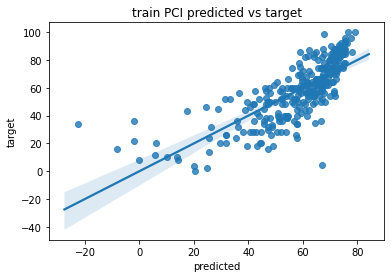

In [18]:
x_train_prediction = multi_linear.predict(X_train)

ax = sns.regplot(x=x_train_prediction, y=y_train,)
ax.set(title = 'train PCI predicted vs target', xlabel='predicted', ylabel='target')



In [ ]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
